In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('./data.xlsx')

In [3]:
data.drop(['ID'], axis='columns', inplace=True)

In [4]:
data.shape

(6000, 8)

In [5]:
data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [7]:
data.isna().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [8]:
data.duplicated().sum()

83

In [9]:
cut_map = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Ideal': 4,
    'Signature-Ideal': 5
}
color_map = {
    'I': 1,
    'H': 2,
    'G': 3,
    'F': 4,
    'E': 5,
    'D': 6
}
clarity_map = {
    'SI1': 1,
    'VS2': 2,
    'VS1': 3,
    'VVS2': 4,
    'VVS1': 5,
    'IF': 6,
    'FL': 7
}
polish_map = {
    'G': 1,
    'VG': 2,
    'EX': 3,
    'ID': 4
}
symmetry_map = {
    'G': 1,
    'VG': 2,
    'EX': 3,
    'ID': 4
}

In [10]:
data['Cut'] = data['Cut'].map(cut_map)
data['Color'] = data['Color'].map(color_map)
data['Clarity'] = data['Clarity'].map(clarity_map)
data['Polish'] = data['Polish'].map(polish_map)
data['Symmetry'] = data['Symmetry'].map(symmetry_map)

In [11]:
data = pd.get_dummies(data, drop_first=True, dtype = int)

In [12]:
data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Price,Report_GIA
0,1.10,4,2,1,2,3,5169,1
1,0.83,4,2,3,4,4,3470,0
2,0.85,4,2,1,3,3,3183,1
3,0.91,4,5,1,2,2,4370,1
4,0.83,4,3,1,3,3,3171,1


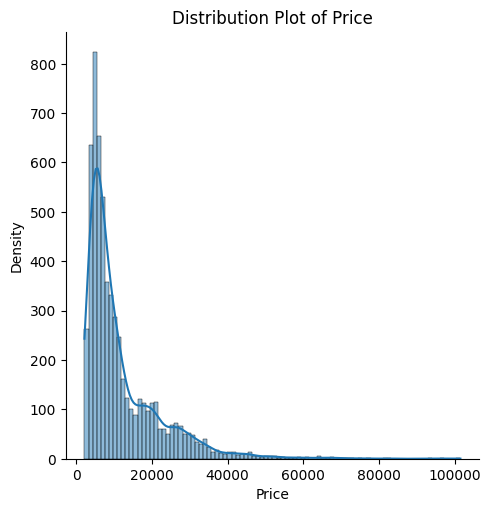

In [13]:
sns.displot(data['Price'], kde=True)  
plt.title('Distribution Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

Text(0.5, 1.0, 'Price Box Plot')

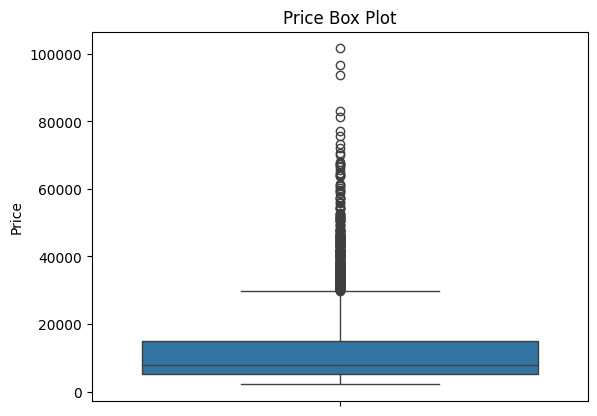

In [14]:
sns.boxplot(data['Price'])
plt.title('Price Box Plot')

In [15]:
data.Price.skew()

2.3145211869537796

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


IndexError: index 2 is out of bounds for axis 0 with size 2

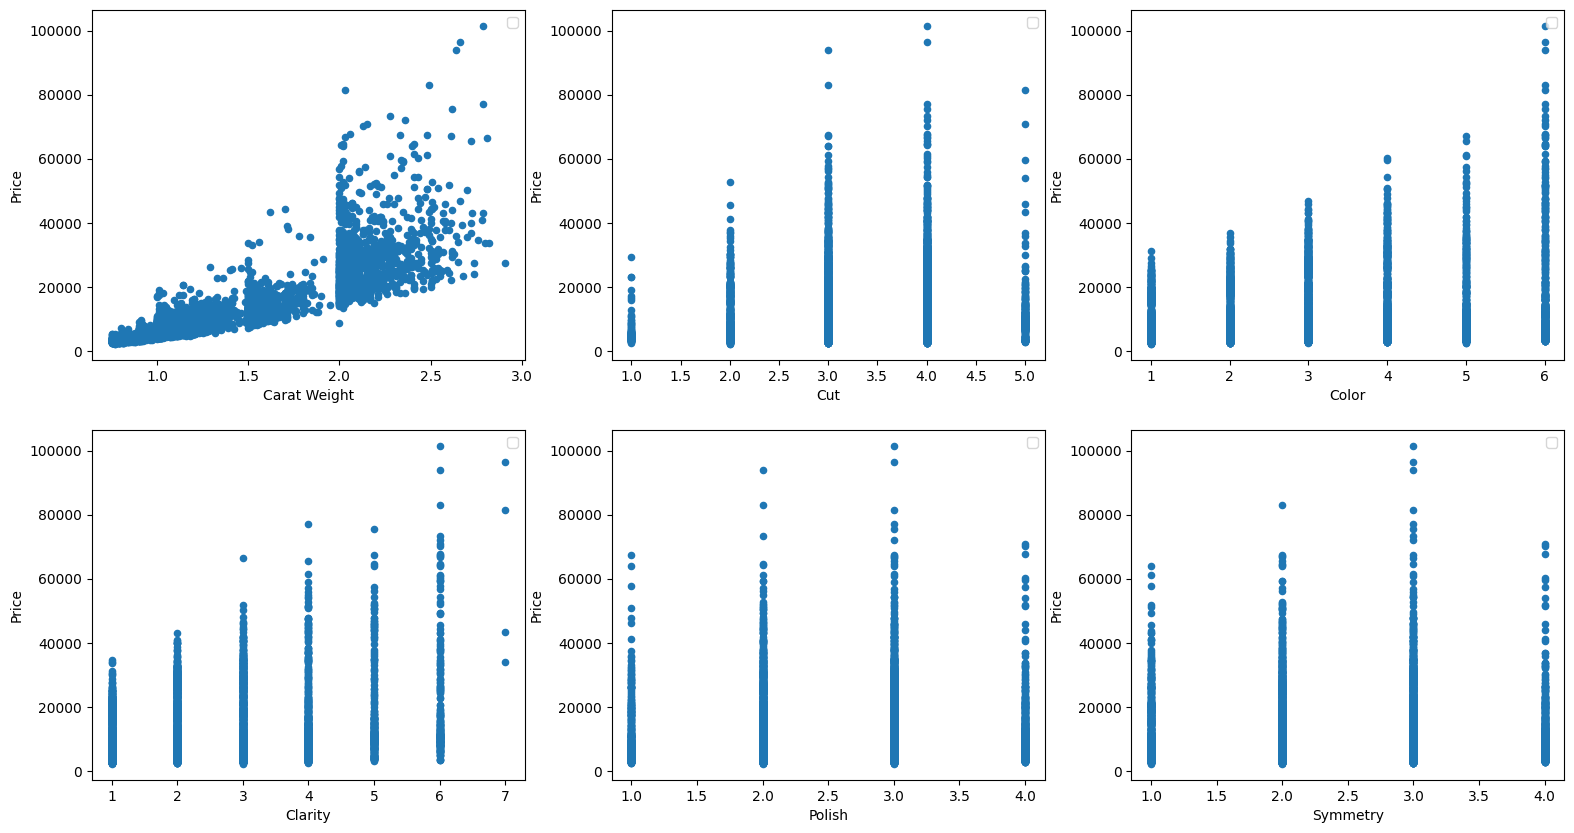

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(19, 10))
for idx, feature in enumerate(data.columns[:-1]):
    data.plot(feature, "Price", subplots=True, kind="scatter", ax=axes[idx // 3, idx % 3])

In [17]:
data.corr(method='pearson')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Price,Report_GIA
Carat Weight,1.000000,0.072943,-0.114013,0.098847,0.051494,0.040413,0.858562,0.011461
Cut,0.072943,1.000000,-0.033047,0.175015,0.462310,0.554999,0.128851,-0.276354
Color,-0.114013,-0.033047,1.000000,0.024873,-0.057132,-0.067727,0.149257,0.105868
Clarity,0.098847,0.175015,0.024873,1.000000,0.148057,0.142141,0.329214,-0.086085
Polish,0.051494,0.462310,-0.057132,0.148057,1.000000,0.720307,0.083064,-0.567507
Symmetry,0.040413,0.554999,-0.067727,0.142141,0.720307,1.000000,0.075820,-0.566545
Price,0.858562,0.128851,0.149257,0.329214,0.083064,0.075820,1.000000,0.013493
Report_GIA,0.011461,-0.276354,0.105868,-0.086085,-0.567507,-0.566545,0.013493,1.000000


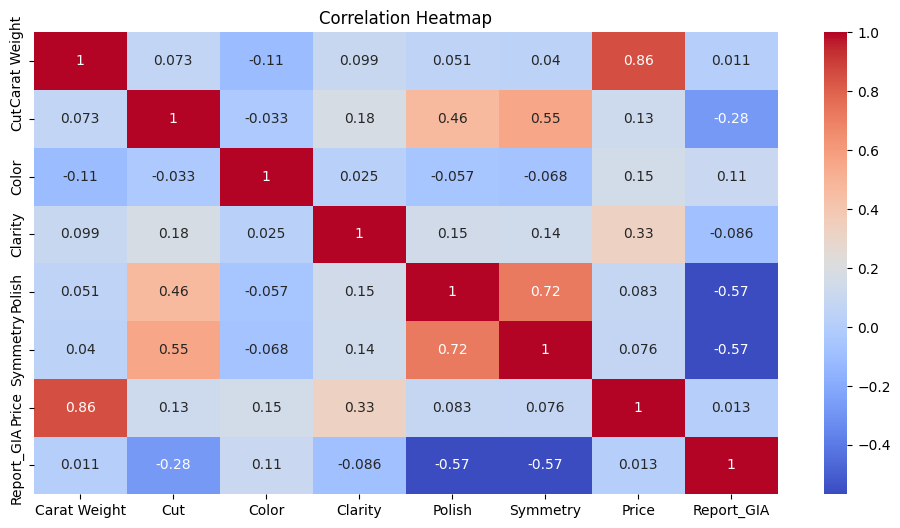

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
data.describe()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Price,Report_GIA
count,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.334520,3.33700,3.256167,2.369333,2.507333,2.393167,11791.579333,0.877667
std,0.475696,0.82029,1.561714,1.370367,0.799199,0.864124,10184.350051,0.327698
min,0.750000,1.00000,1.000000,1.000000,1.000000,1.000000,2184.000000,0.000000
25%,1.000000,3.00000,2.000000,1.000000,2.000000,2.000000,5150.500000,1.000000
50%,1.130000,3.00000,3.000000,2.000000,3.000000,2.000000,7857.000000,1.000000
75%,1.590000,4.00000,4.000000,3.000000,3.000000,3.000000,15036.500000,1.000000
max,2.910000,5.00000,6.000000,7.000000,4.000000,4.000000,101561.000000,1.000000


In [20]:
X = data.drop('Price', axis=1)
y = data['Price']

In [21]:
X.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report_GIA
0,1.10,4,2,1,2,3,1
1,0.83,4,2,3,4,4,0
2,0.85,4,2,1,3,3,1
3,0.91,4,5,1,2,2,1
4,0.83,4,3,1,3,3,1


In [22]:
y.head()

0    5169
1    3470
2    3183
3    4370
4    3171
Name: Price, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ln = LinearRegression()
ln.fit(X_train, y_train)

ln_train_pred = ln.predict(X_train)
ln_test_pred = ln.predict(X_test)

ln_train_rmse = mean_squared_error(y_train, ln_train_pred, squared=False)
ln_test_rmse = mean_squared_error(y_test, ln_test_pred, squared=False)

print("Linear Regression Train RMSE:", ln_train_rmse)
print("Linear Regression Test RMSE:", ln_test_rmse)

Linear Regression Train RMSE: 4014.659067538632
Linear Regression Test RMSE: 3185.532467188028


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_

rf_train_preds = best_rf_model.predict(X_train)
rf_test_preds = best_rf_model.predict(X_test)

rf_train_rmse = mean_squared_error(y_train, rf_train_preds, squared=False)
rf_test_rmse = mean_squared_error(y_test, rf_test_preds, squared=False)

print("Random Forest Train RMSE:", rf_train_rmse)
print("Random Forest Test RMSE:", rf_test_rmse)
print("Best Random Forest Model:", best_rf_model)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Random Forest Train RMSE: 811.6912522770416
Random Forest Test RMSE: 1215.8969590864465
Best Random Forest Model: RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=200)


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np


param_grid = {
    'n_estimators': [200, 300, 400], 
    'learning_rate': [0.01, 0.05, 0.1], 
    'max_depth': [3, 5],  
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [3, 4, 5], 
    'subsample': [0.8, 0.9], 
    'max_features': ['sqrt', 'log2'] 
}

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_

train_preds = best_gb_model.predict(X_train)
test_preds = best_gb_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print("Best Gradient Boosting Model:", best_gb_model)
print("Gradient Boosting Train RMSE:", train_rmse)
print("Gradient Boosting Test RMSE:", test_rmse)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Gradient Boosting Model: GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='sqrt',
                          min_samples_leaf=5, min_samples_split=10,
                          n_estimators=400, random_state=42, subsample=0.8)
Gradient Boosting Train RMSE: 802.1673314210037
Gradient Boosting Test RMSE: 1067.2019084906078


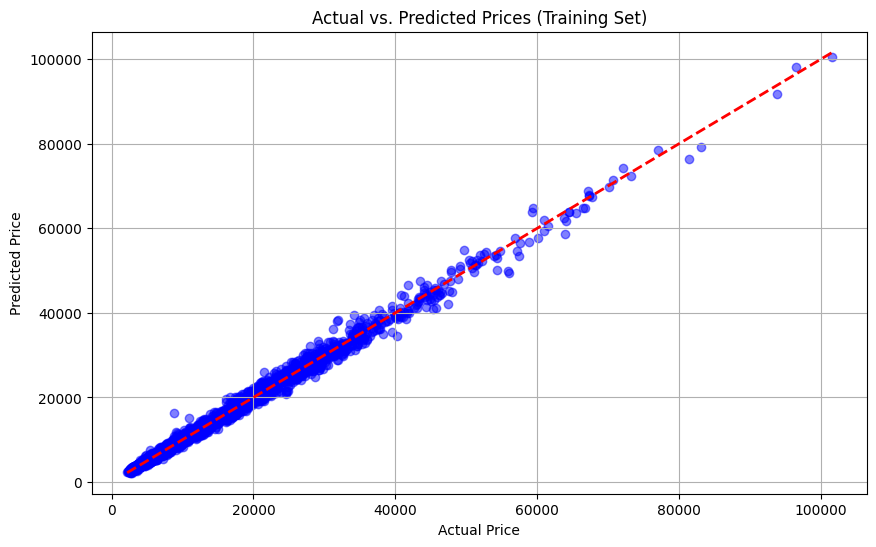

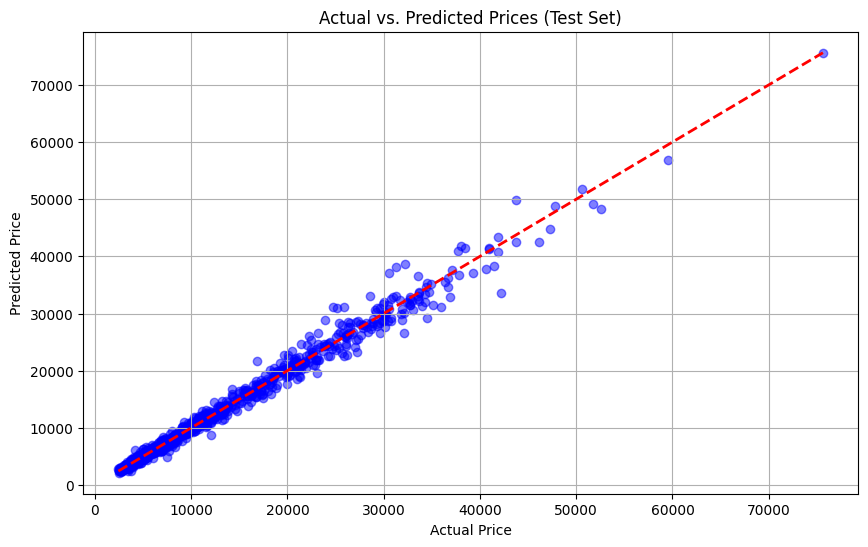

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_preds, color='blue', alpha=0.5)  
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Prices (Training Set)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_preds, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Prices (Test Set)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

In [30]:
all_diamonds_preds = best_gb_model.predict(data.drop(columns=['Price']))

data['Predicted_Price'] = all_diamonds_preds

top_diamonds_for_sarah = data.sort_values(by='Predicted_Price', ascending=False).head(10)

print(top_diamonds_for_sarah)

      Carat Weight  Cut  Color  Clarity  Polish  Symmetry   Price  Report_GIA  \
3192          2.79    4      6        6       3         3  101561           1   
188           2.66    4      6        7       3         3   96493           1   
1881          2.64    3      6        6       2         3   93813           1   
4401          2.49    3      6        6       2         2   83145           1   
4670          2.79    4      6        4       3         3   77033           1   
4257          2.03    5      6        7       3         3   81399           1   
810           2.62    4      6        5       3         3   75630           1   
5633          2.36    4      6        6       3         3   72195           1   
46            2.28    4      6        6       2         3   73209           1   
5584          2.15    5      6        6       4         4   70683           0   

      Predicted_Price  
3192    100651.359799  
188      98119.491994  
1881     91681.540666  
4401     791

In [31]:
print(top_diamonds_for_sarah)

      Carat Weight  Cut  Color  Clarity  Polish  Symmetry   Price  Report_GIA  \
3192          2.79    4      6        6       3         3  101561           1   
188           2.66    4      6        7       3         3   96493           1   
1881          2.64    3      6        6       2         3   93813           1   
4401          2.49    3      6        6       2         2   83145           1   
4670          2.79    4      6        4       3         3   77033           1   
4257          2.03    5      6        7       3         3   81399           1   
810           2.62    4      6        5       3         3   75630           1   
5633          2.36    4      6        6       3         3   72195           1   
46            2.28    4      6        6       2         3   73209           1   
5584          2.15    5      6        6       4         4   70683           0   

      Predicted_Price  
3192    100651.359799  
188      98119.491994  
1881     91681.540666  
4401     791